Data Variable Description

- E Comm CustomerID : ID pelanggan unik
- E Comm Churn : label churn atau tidak churn
- E Comm Tenure : Kepemilikan pelanggan dalam organisasi
- E Comm PreferredLoginDevice: Perangkat login pilihan pelanggan
- E Comm CityTier : Tingkat kota
- E Comm WarehouseToHome : Jarak antara gudang ke rumah pelanggan
- E Comm PreferredPaymentMode: Metode pembayaran pilihan pelanggan
- E Comm Gender: Jenis kelamin pelanggan
- E Comm HourSpendOnApp: Jumlah jam yang dihabiskan di aplikasi seluler atau situs web
- E Comm NumberOfDeviceRegistered: Jumlah total penipuan yang terdaftar pada pelanggan tertentu
- E Comm PreferedOrderCat : Kategori pesanan pilihan pelanggan pada bulan lalu
- E Comm SatisfactionScore : Skor kepuasan pelanggan terhadap layanan
- E Comm MaritalStatus: Status perkawinan pelanggan
- E Comm NumberOfAddress: Jumlah total penambahan pada pelanggan tertentu
- E Comm Complain : Setiap keluhan telah diajukan pada bulan lalu
- E Comm OrderAmountHikeFromlastYear : Persentase meningkat secara berurutan dari tahun lalu
- E Comm CouponUsed: Jumlah total kupon yang telah digunakan dalam sebulan terakhir
- E Comm OrderCount : Jumlah total pesanan yang dilakukan pada bulan lalu
- E Comm DaySinceLastOrder : Hari Sejak pesanan terakhir oleh pelanggan
- E Comm CashbackAmount : Rata-rata cashback pada bulan lalu


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install plotly
#pip install xlrd
#pip install missingno

In [3]:
path = ('E Commerce Dataset.xlsx')
df = pd.read_excel(path, sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# dimensi data
df.shape

(5630, 20)

In [5]:
#Tipe data
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [6]:
# Menampilkan kolom berjenis object dengan nilai yang unik saja
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Gender
Male      3384
Female    2246
Name: count, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion    

In [7]:
df.describe(include='O')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


# Preprocessing
## Data Cleaning

In [9]:
df1=df.copy()
df1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [10]:
df1.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [12]:
df1.shape[0]-df.dropna().shape[0]

1856

In [13]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
df_num_cl_missing= missing_values_table(df1)
df_num_cl_missing

Your selected dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5


In [15]:
from sklearn.impute import KNNImputer
df_num = df1.select_dtypes(exclude="object")
df_num_cl_knn = df_num.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
x_knn = knn_imputer.fit_transform(df_num_cl_knn)

In [16]:
df_num_cl_knn = pd.DataFrame(x_knn , columns=df_num_cl_knn.columns)
df_num_cl_knn.head(10)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,50002.0,1.0,6.5,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,50003.0,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,50004.0,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,50005.0,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60
5,50006.0,1.0,0.0,1.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,4.0,6.0,7.0,139.19
6,50007.0,1.0,6.5,3.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,0.0,120.86
7,50008.0,1.0,6.5,1.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,0.0,122.93
8,50009.0,1.0,13.0,3.0,9.0,2.5,4.0,3.0,2.0,1.0,14.0,0.0,1.0,2.0,126.83
9,50010.0,1.0,0.0,1.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,1.0,122.93


In [17]:
df_num_cl_knn.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
CityTier                       0
WarehouseToHome                0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
SatisfactionScore              0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [18]:
df_cat = df.select_dtypes(exclude=['number'])

df_cl= pd.concat([df_num_cl_knn, df_cat], axis=1)

In [19]:
#Karena fungsi kolom tersebut tidak untuk Perhitungan
df_cl['Churn'] = df_cl['Churn'].astype('object')
df_cl['CityTier'] = df_cl['CityTier'].astype('object')

## Outlier Checking

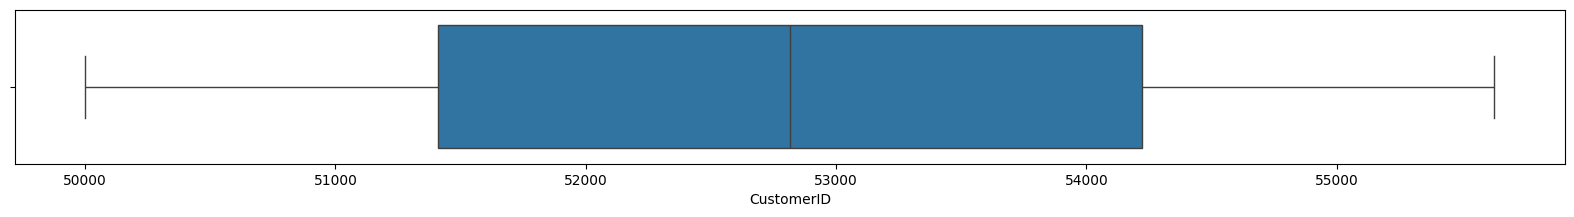

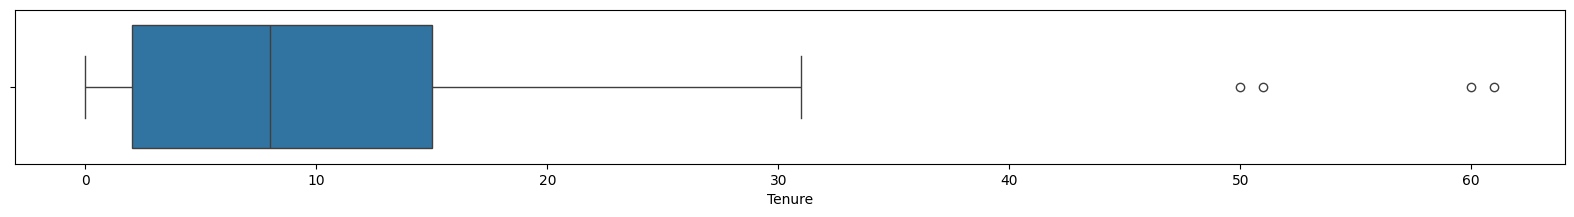

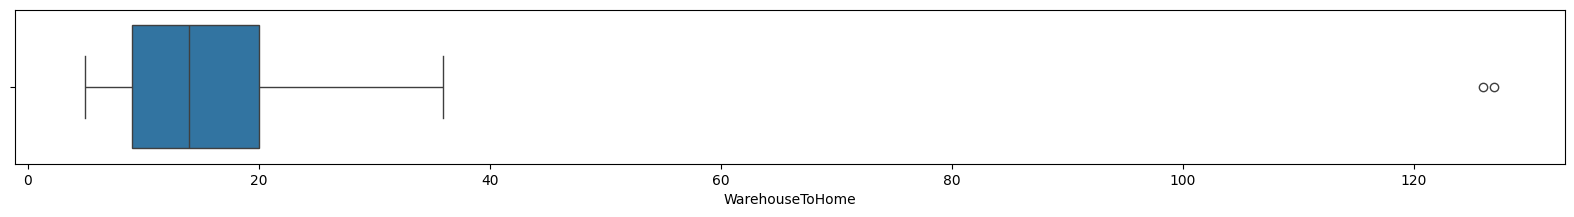

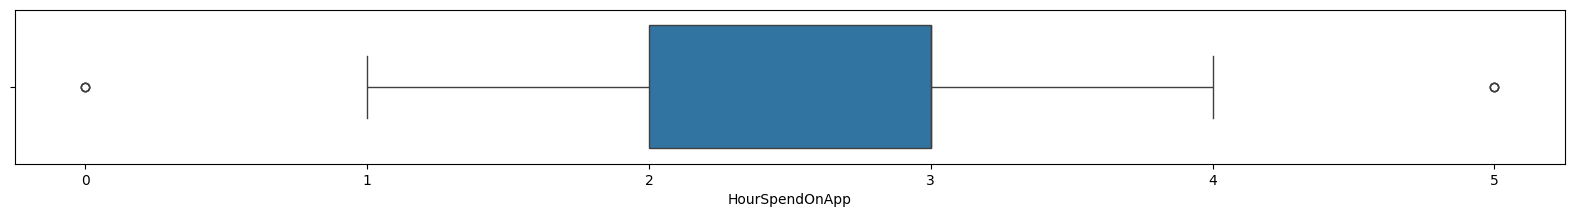

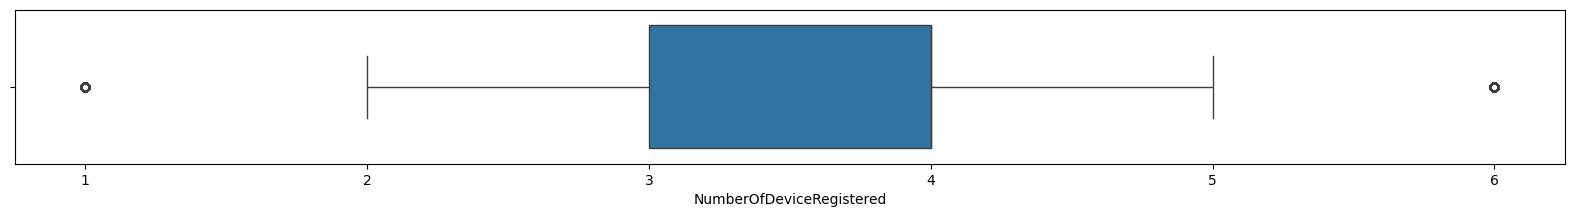

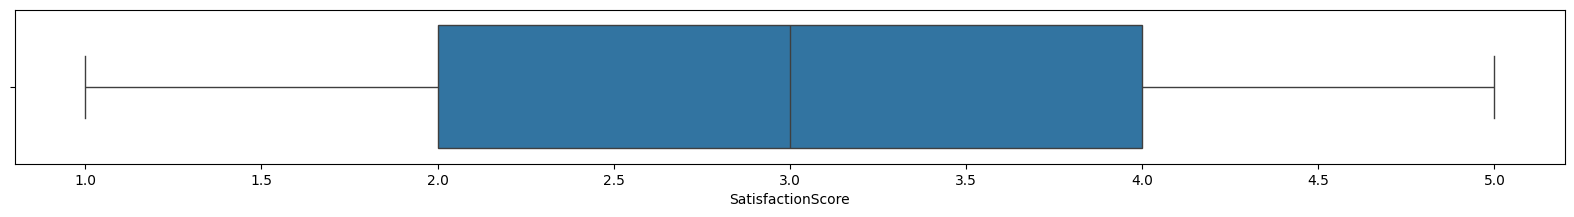

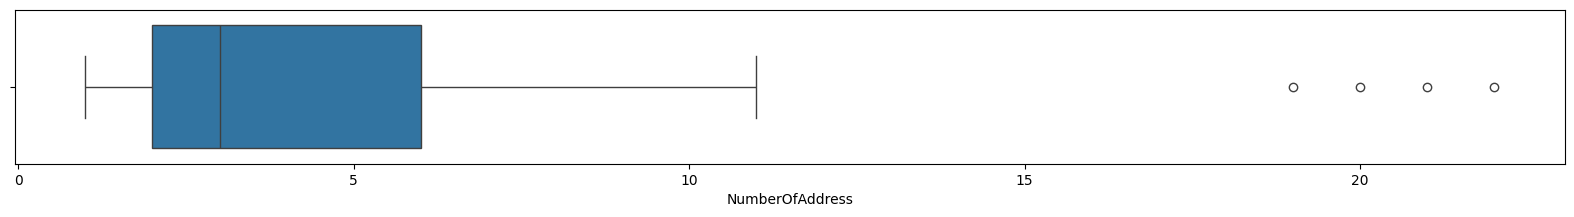

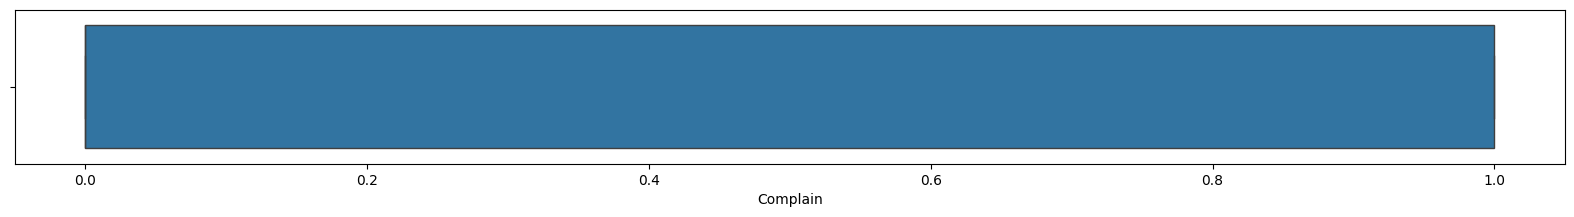

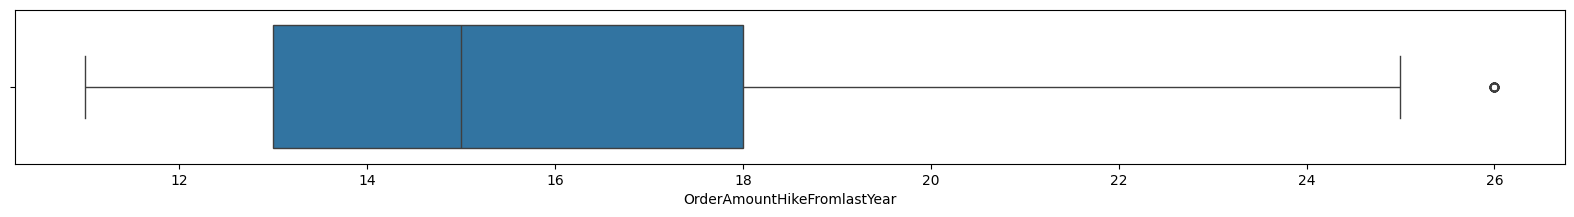

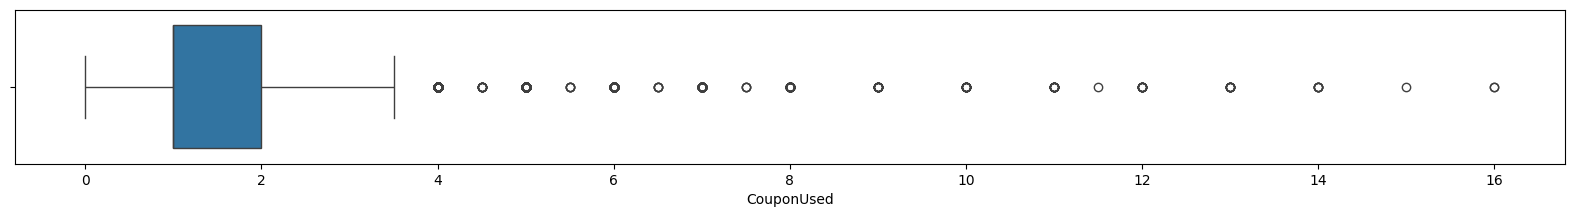

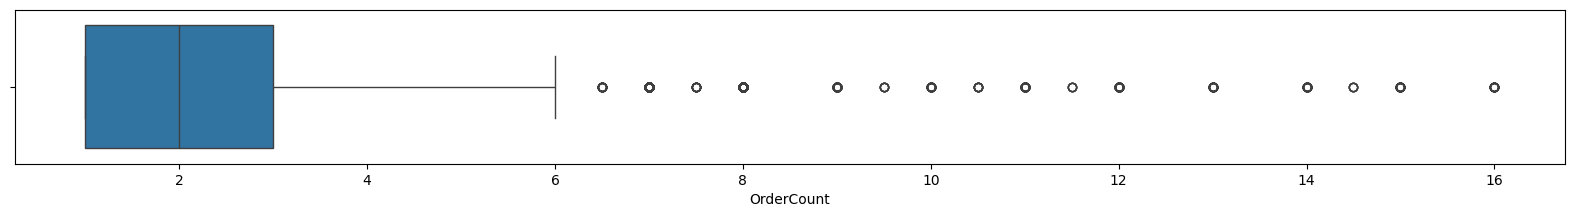

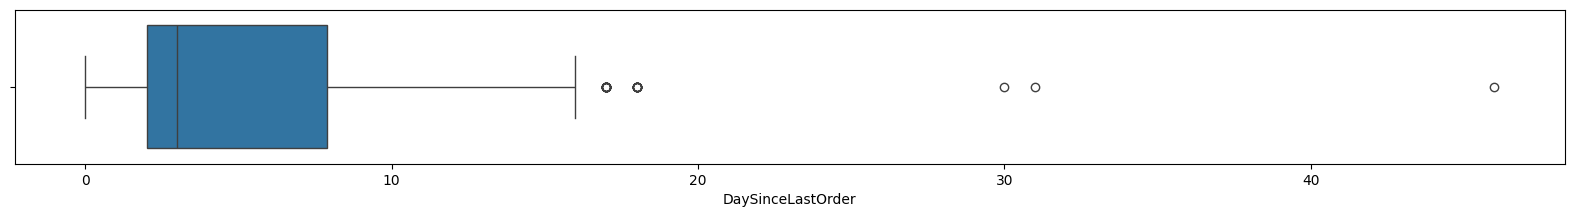

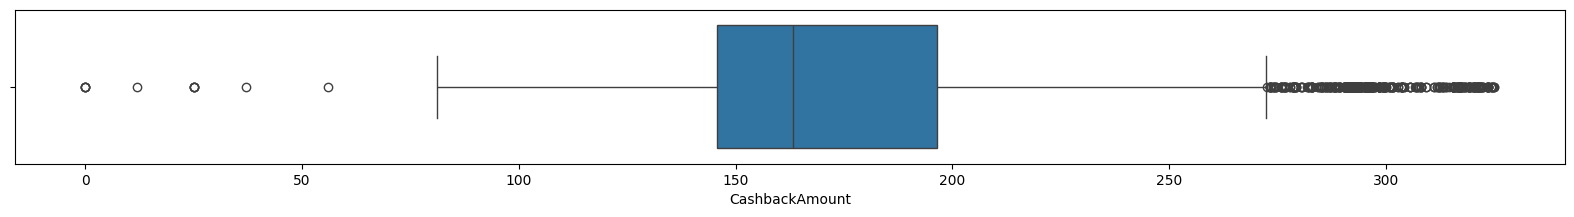

In [20]:
# Mencari Outliers - Boxplot
df_outlier = df_cl.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [22]:
for column in df_cl.columns:
    if df_cl[column].dtype != 'object' :
        lr,ur=remove_outlier(df_cl[column])
        df_cl[column]=np.where(df_cl[column]>ur,ur,df_cl[column])
        df_cl[column]=np.where(df_cl[column]<lr,lr,df_cl[column])

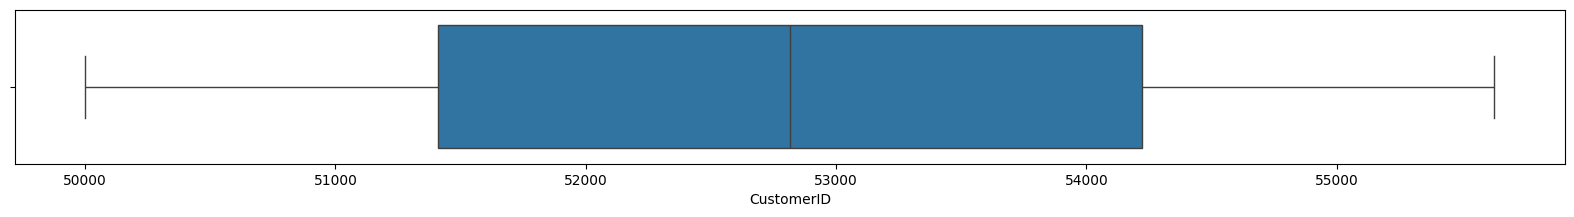

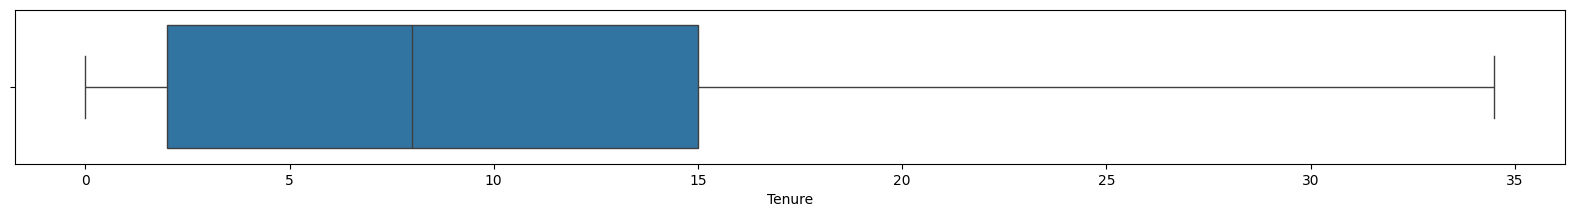

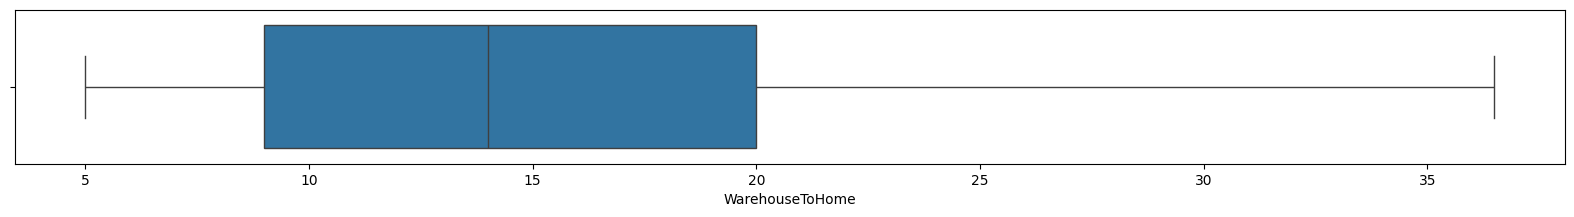

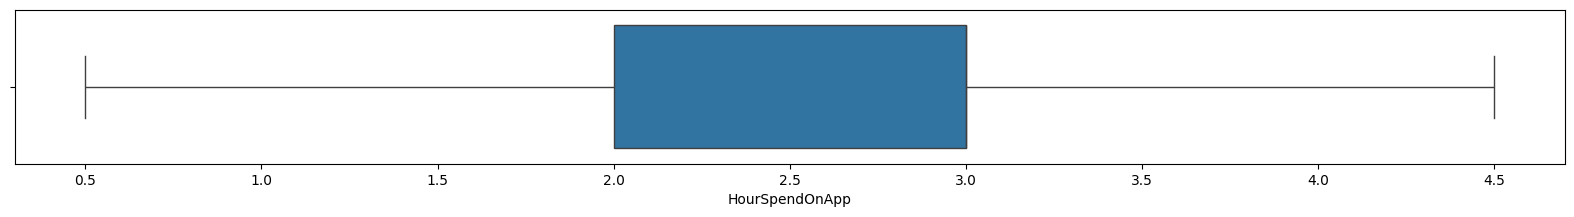

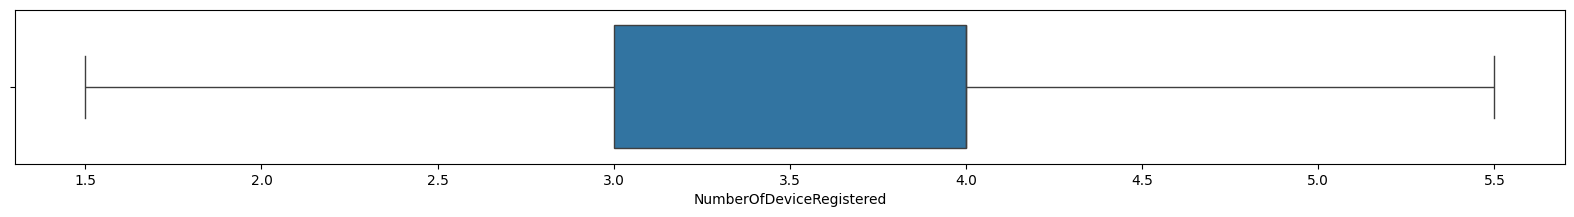

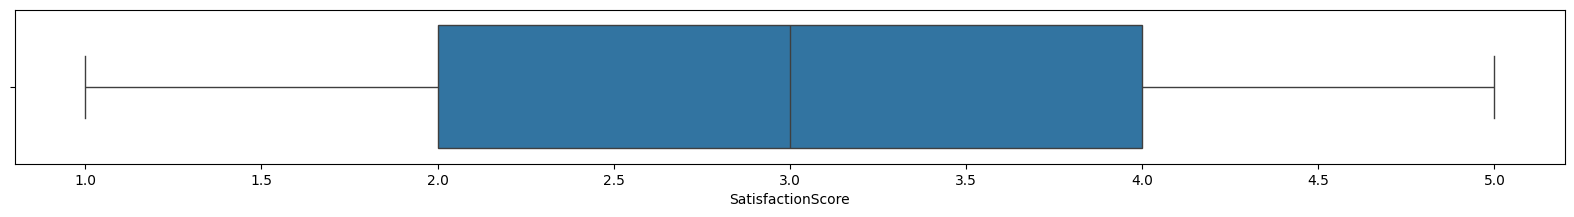

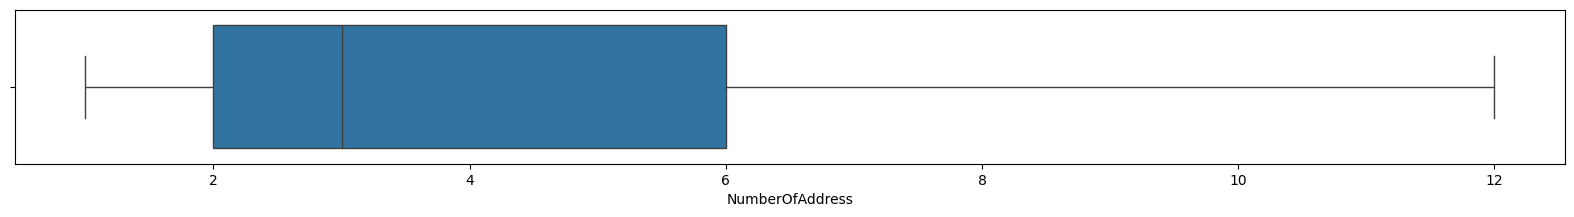

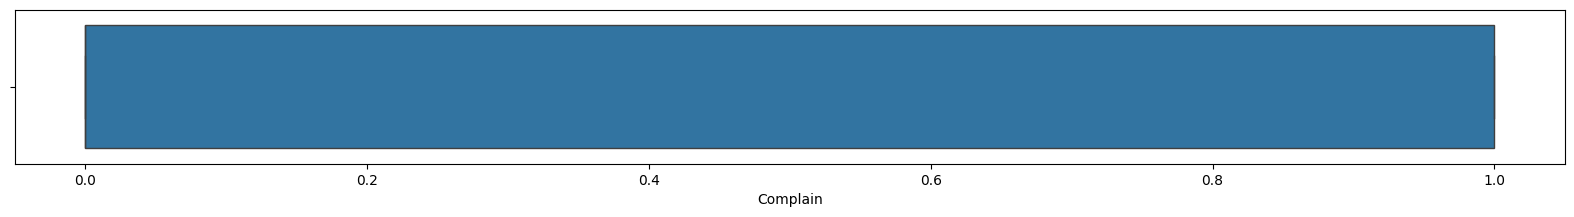

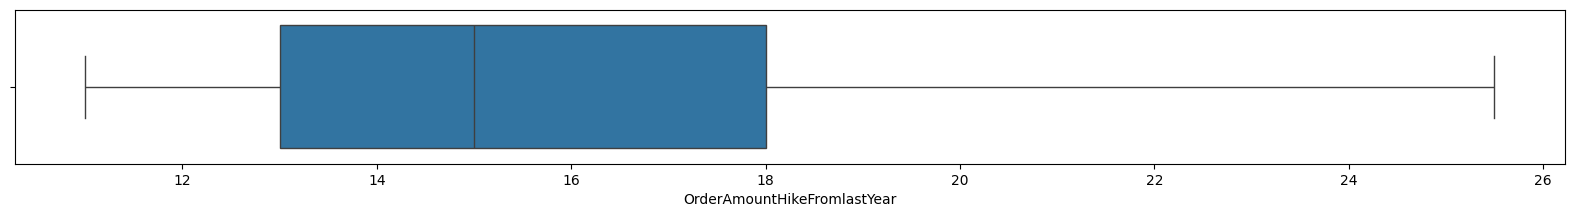

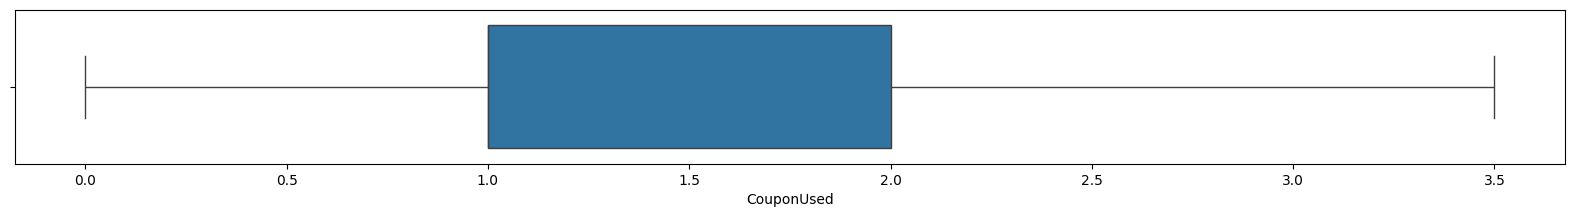

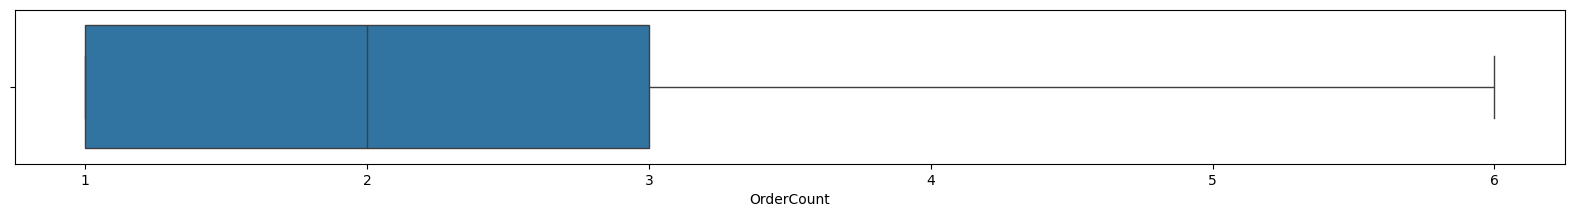

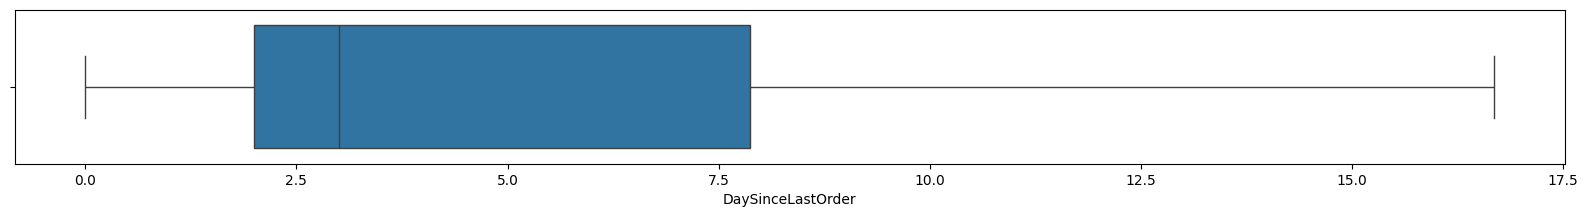

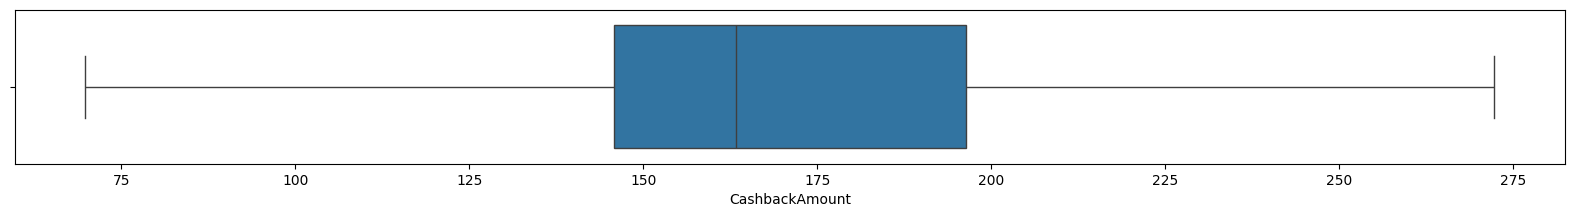

In [23]:
# Mencari Outliers - Boxplot
df_outlier = df_cl.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

# One Hot coding

In [24]:
df_encoded=df_cl.copy()
df_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,50001.0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,50002.0,1.0,6.5,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90,Phone,UPI,Male,Mobile,Single
2,50003.0,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,Phone,Debit Card,Male,Mobile,Single
3,50004.0,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,Phone,Debit Card,Male,Laptop & Accessory,Single
4,50005.0,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60,Phone,CC,Male,Mobile,Single


In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   float64
 1   Churn                        5630 non-null   object 
 2   Tenure                       5630 non-null   float64
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   HourSpendOnApp               5630 non-null   float64
 6   NumberOfDeviceRegistered     5630 non-null   float64
 7   SatisfactionScore            5630 non-null   float64
 8   NumberOfAddress              5630 non-null   float64
 9   Complain                     5630 non-null   float64
 10  OrderAmountHikeFromlastYear  5630 non-null   float64
 11  CouponUsed                   5630 non-null   float64
 12  OrderCount                   5630 non-null   float64
 13  DaySinceLastOrder 

In [26]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Churn', "CityTier", "PreferredLoginDevice", "PreferredPaymentMode", "Gender","PreferedOrderCat","MaritalStatus"]

In [27]:
cat_col

['Churn',
 'CityTier',
 'PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [28]:
# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_encoded[cat_col] = df_encoded[cat_col].apply(le.fit_transform)

In [29]:
df_encoded.dtypes

CustomerID                     float64
Churn                            int64
Tenure                         float64
CityTier                         int64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered       float64
SatisfactionScore              float64
NumberOfAddress                float64
Complain                       float64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
PreferredLoginDevice             int64
PreferredPaymentMode             int64
Gender                           int64
PreferedOrderCat                 int64
MaritalStatus                    int64
dtype: object

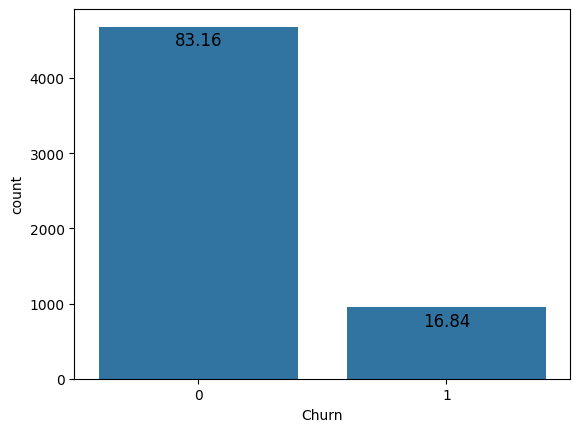

In [30]:
#count the number of customers in the churn and not churn class
ax = sns.countplot(x='Churn', data=df_encoded)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

## Handling Imbalanced Data

In [31]:
X=df_encoded.drop(['Churn'],axis=1)
y=df_encoded['Churn']

In [32]:
X

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,50001.0,4.0,2,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,1,4,0,2,2
1,50002.0,6.5,0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90,2,6,1,3,2
2,50003.0,0.0,0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,2,4,1,3,2
3,50004.0,0.0,2,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,2,4,1,2,2
4,50005.0,0.0,0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60,2,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626.0,10.0,0,30.0,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,150.71,0,3,1,2,1
5626,55627.0,13.0,0,13.0,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,4.0,224.91,1,3,1,0,1
5627,55628.0,1.0,0,11.0,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.42,1,4,1,2,1
5628,55629.0,23.0,2,9.0,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,178.90,0,3,1,2,1


In [33]:
print('Before OverSampling, the shape of X: {}'.format(X.shape))
print('Before OverSampling, the shape of y: {} \n'.format(y.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (5630, 19)
Before OverSampling, the shape of y: (5630,) 

Before OverSampling, counts of label '1': 948
Before OverSampling, counts of label '0': 4682


In [34]:
#pip install imblearn

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X, y.ravel())

In [36]:
X_res=pd.DataFrame(X_res)
#Renaming column name of Target variable
y_res=pd.DataFrame(y_res)
y_res.columns = ['Churn']
scaled_df_encoded_smote = pd.concat([X_res,y_res], axis=1)

In [37]:
scaled_df_encoded_smote

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Churn
0,50001.000000,4.000000,2,6.000000,3.000000,3.000000,2.000000,9.000000,1.000000,11.000000,1.000000,1.000000,5.000000,159.930000,1,4,0,2,2,1
1,50002.000000,6.500000,0,8.000000,3.000000,4.000000,3.000000,7.000000,1.000000,15.000000,0.000000,1.000000,0.000000,120.900000,2,6,1,3,2,1
2,50003.000000,0.000000,0,30.000000,2.000000,4.000000,3.000000,6.000000,1.000000,14.000000,0.000000,1.000000,3.000000,120.280000,2,4,1,3,2,1
3,50004.000000,0.000000,2,15.000000,2.000000,4.000000,5.000000,8.000000,0.000000,23.000000,0.000000,1.000000,3.000000,134.070000,2,4,1,2,2,1
4,50005.000000,0.000000,0,12.000000,2.000000,3.000000,5.000000,3.000000,0.000000,11.000000,1.000000,1.000000,3.000000,129.600000,2,0,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9359,54186.622938,1.000000,0,12.026237,3.162294,4.000000,4.350825,4.000000,0.162294,12.811469,1.000000,2.162294,3.513119,153.517500,1,3,1,4,1,1
9360,52796.043336,10.456337,1,7.000000,2.804334,3.000000,2.608667,8.391333,0.195666,12.391333,1.195666,1.195666,1.195666,163.482115,0,3,1,2,1,1
9361,54888.712896,1.000000,0,17.511991,3.000000,4.612443,4.000000,2.612443,0.612443,22.287104,1.612443,2.000000,3.000000,157.310378,0,4,0,4,1,1
9362,52272.710952,0.000000,0,17.281610,2.251859,3.503719,2.496281,3.496281,1.000000,13.251859,2.870351,4.740703,5.236984,127.796202,1,1,0,3,1,1


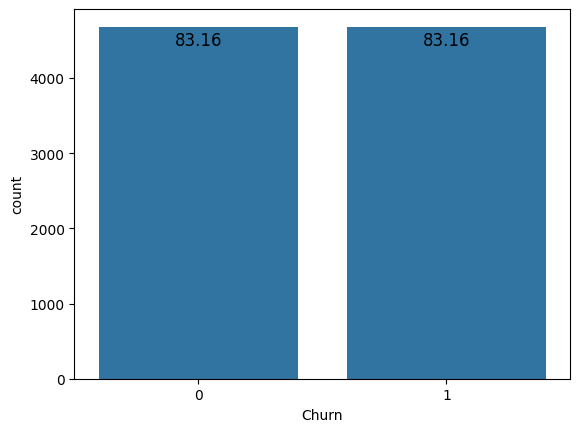

In [38]:
#count the number of customers in the churn and not churn class
ax = sns.countplot(x='Churn', data=scaled_df_encoded_smote)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

## Visualisasi

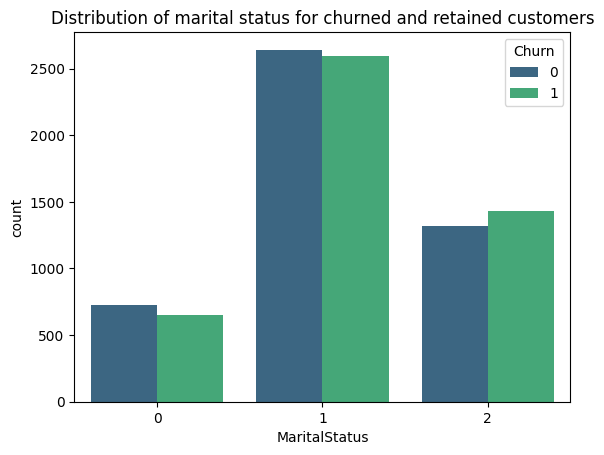

In [39]:
sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=scaled_df_encoded_smote)
plt.title("Distribution of marital status for churned and retained customers")
plt.show()

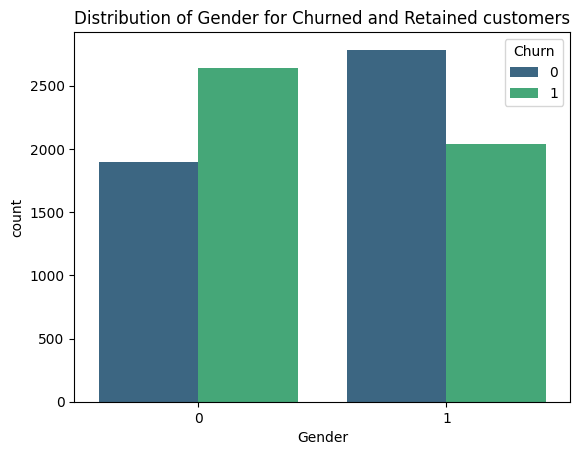

In [40]:
sns.countplot(x='Gender', hue='Churn', palette='viridis', data=scaled_df_encoded_smote)
plt.title("Distribution of Gender for Churned and Retained customers")
plt.show()

In [41]:
scaled_df_encoded_smote.shape

(9364, 20)

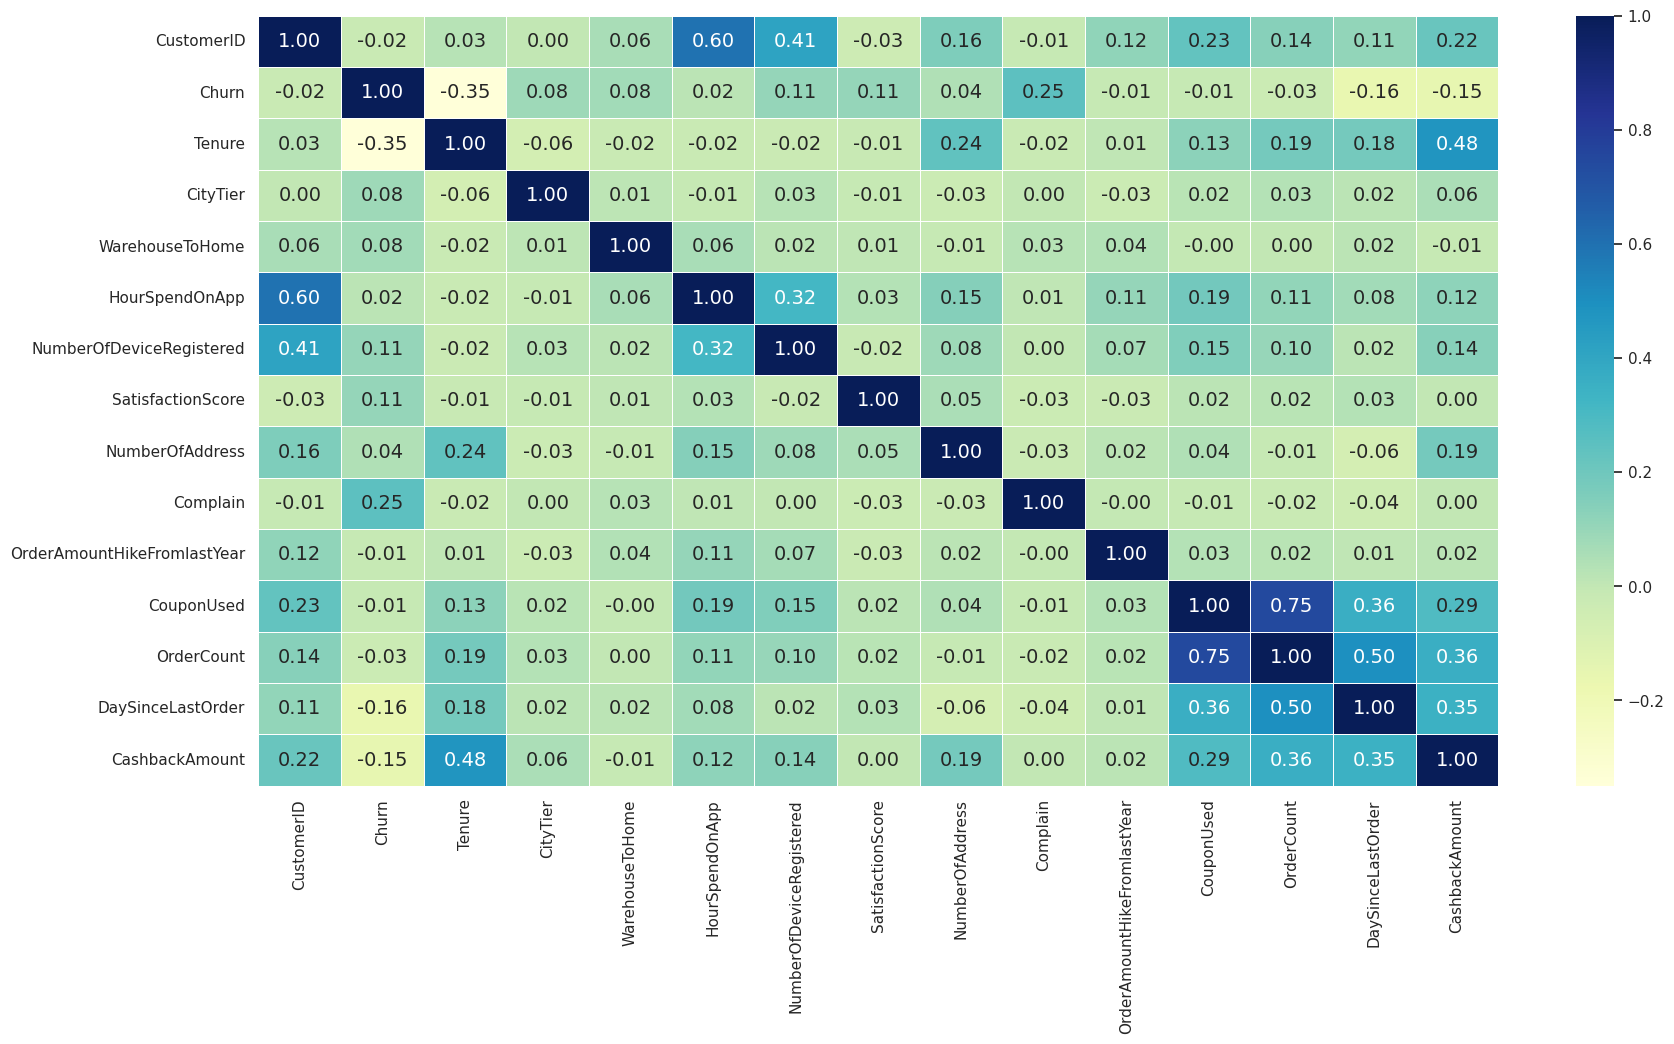

In [42]:
sns.set_theme()

# Membuat heatmap dengan ukuran kotak yang lebih besar
plt.figure(figsize=(20, 10))  # Mengatur ukuran keseluruhan heatmap
ax = sns.heatmap(df.select_dtypes(exclude=['object']).corr(), 
                 annot=True, 
                 fmt=".2f", 
                 cmap="YlGnBu", 
                 annot_kws={"size": 14},  # Mengatur ukuran font anotasi
                 linewidths=0.5)  # Mengatur ketebalan garis antar kotak

# Menampilkan plot
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")
#selecting features and target variable, and splitting the data
X=scaled_df_encoded_smote.drop(['Churn'],axis=1)
y=scaled_df_encoded_smote['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#cross validation
skfcv=StratifiedKFold(n_splits=5)

In [44]:
# Now we  will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
# SC = StandardScaler()
# Rb = RobustScaler()
x_train_scaled = MN.fit_transform(X_train)
x_test_scaled = MN.fit_transform(X_test)

In [45]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()

In [46]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [47]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.8168468829261781
Test Score: 0.8275493860117459
Acc Train: 0.8168468829261781
Acc Test: 0.8275493860117459
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.9455346415698839
Test Score: 0.9199145755472504
Acc Train: 0.9455346415698839
Acc Test: 0.9199145755472504
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9508809396689802
Acc Train: 1.0
Acc Test: 0.9508809396689802
                                                            
************************************************************
                                                            
Using m

In [48]:
all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.816847,0.827549
Support Vector Machine,0.945535,0.919915
Decision Tree,1.000000,0.950881
Random Forest,1.000000,0.972771
XGBClassifier,1.000000,0.980246
AdaBoostClassifier,0.905887,0.884143


In [49]:
#pip install mlxtend

Accuracy = 0.9199145755472504
ROC Area under Curve = 0.9199191135557198
              precision    recall  f1-score   support

           0    0.92725   0.91142   0.91927       937
           1    0.91282   0.92842   0.92055       936

    accuracy                        0.91991      1873
   macro avg    0.92003   0.91992   0.91991      1873
weighted avg    0.92004   0.91991   0.91991      1873



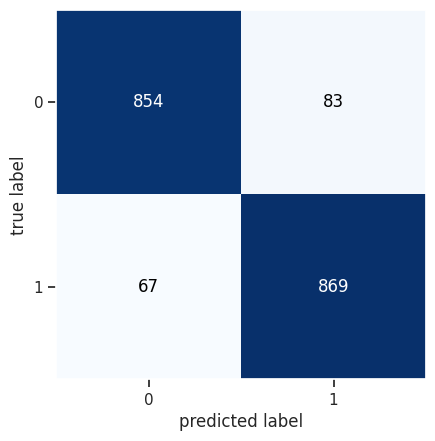

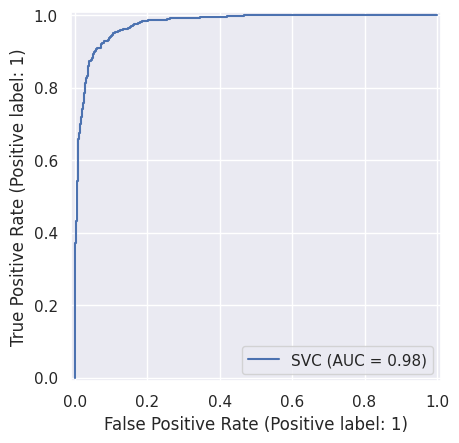

In [50]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay
# Support Vector Machine
model=SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc2))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

In [51]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
import joblib
joblib.dump(model, 'SVM_model.sav')
joblib.dump(MN, 'features_scaler.sav')
joblib.dump(le, 'label_encoder.sav')

['label_encoder.sav']